In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("./amazon.csv", encoding="iso-8859-1", parse_dates=['date'])

In [3]:
data.dtypes

year               int64
state             object
month             object
number           float64
date      datetime64[ns]
dtype: object

#### 1. Display top 5 rows of the dataset

In [4]:
data.head()

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


#### 2. check last 5 rows of the dataset

In [5]:
data.tail()

,year,state,month,number,date
6449,2012,Tocantins,Dezembro,128.0,2012-01-01
6450,2013,Tocantins,Dezembro,85.0,2013-01-01
6451,2014,Tocantins,Dezembro,223.0,2014-01-01
6452,2015,Tocantins,Dezembro,373.0,2015-01-01
6453,2016,Tocantins,Dezembro,119.0,2016-01-01


#### 3. Find shape of our dataset (number of rows and number of columns)

In [6]:
print("Rows: ", data.shape[0])
print("Columns: ", data.shape[1])

Rows:  6454
Columns:  5


#### 4. Getting information about our dataset like total number rows, and total number of columns, datatypes of each column and memory requirement

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   year    6454 non-null   int64         
 1   state   6454 non-null   object        
 2   month   6454 non-null   object        
 3   number  6454 non-null   float64       
 4   date    6454 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 252.2+ KB


#### 5. check for duplicate data and drop them

In [8]:
print("Are data duplicated? ", data.duplicated().any())

Are data duplicated?  True


In [9]:
data = data.drop_duplicates()

In [10]:
data.shape

(6422, 5)

#### Difference between original data frame and new dataframe without duplicates values

In [11]:
6454-6422

32

#### Check null Values in the dataset

In [12]:
data.isnull().sum()

year      0
state     0
month     0
number    0
date      0
dtype: int64

#### 7. Get overall statistcis about the dataframe

In [13]:
data.describe(include='all', datetime_is_numeric = True)

,year,state,month,number,date
count,6422.000000,6422,6422,6422.000000,6422
unique,NaN,23,12,NaN,NaN
top,NaN,Rio,Agosto,NaN,NaN
freq,NaN,697,540,NaN,NaN
mean,2007.490969,NaN,NaN,108.815178,2007-06-29 10:46:40.622859008
min,1998.000000,NaN,NaN,0.000000,1998-01-01 00:00:00
25%,2003.000000,NaN,NaN,3.000000,2003-01-01 00:00:00
50%,2007.000000,NaN,NaN,24.497000,2007-01-01 00:00:00
75%,2012.000000,NaN,NaN,114.000000,2012-01-01 00:00:00
max,2017.000000,NaN,NaN,998.000000,2017-01-01 00:00:00


#### 8. Rename month names to english

In [14]:
data.columns

Index(['year', 'state', 'month', 'number', 'date'], dtype='object')

In [15]:
data['month'].unique()

array(['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho',
       'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro'],
      dtype=object)

In [16]:
data['month_new'] = data['month'].map({
    'Janeiro': 'Jan',
    'Fevereiro': 'Feb',
    'Março' : 'March',
    'Abril' : 'April',
    'Maio':'May',
     'Junho': 'Jun',
     'Julho': 'July',
    'Agosto': 'August',
    'Setembro': 'Sep',
    'Outubro': 'Oct',
    'Novembro': 'Nov',
    'Dezembro': 'Dec'
})

In [17]:
data.head()

,year,state,month,number,date,month_new
0,1998,Acre,Janeiro,0.0,1998-01-01,Jan
1,1999,Acre,Janeiro,0.0,1999-01-01,Jan
2,2000,Acre,Janeiro,0.0,2000-01-01,Jan
3,2001,Acre,Janeiro,0.0,2001-01-01,Jan
4,2002,Acre,Janeiro,0.0,2002-01-01,Jan


#### 9. Total number of fires registred

In [18]:
data.shape[0]

6422

#### 10. In which month maximum number of forest fires were reported

In [19]:
data1 = data.groupby('month_new')['number'].sum().reset_index()
data1

,month_new,number
0,April,28184.770
1,August,88050.435
2,Dec,57535.480
3,Feb,30839.050
4,Jan,47681.844
5,July,92319.113
6,Jun,55997.675
7,March,30709.405
8,May,34725.363
9,Nov,85508.054


<AxesSubplot: xlabel='month_new', ylabel='number'>

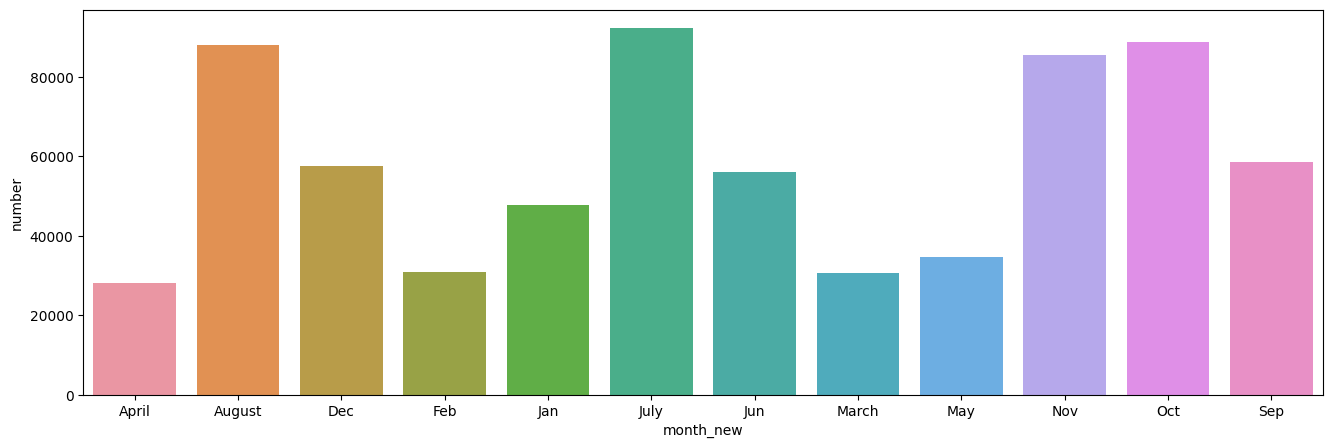

In [20]:
plt.figure(figsize = (16,5))
sns.barplot(data1 , x = 'month_new', y = "number")

#### 11. In which year maximum number of forest fires were reported 

In [21]:
data.columns

Index(['year', 'state', 'month', 'number', 'date', 'month_new'], dtype='object')

In [22]:
data2 = data.groupby('year')['number'].sum().reset_index()
data2

,year,number
0,1998,20013.971
1,1999,26882.821
2,2000,27351.251
3,2001,29054.612
4,2002,37390.600
5,2003,42760.674
6,2004,38450.163
7,2005,35004.965
8,2006,33824.161
9,2007,33028.413


<AxesSubplot: xlabel='year', ylabel='number'>

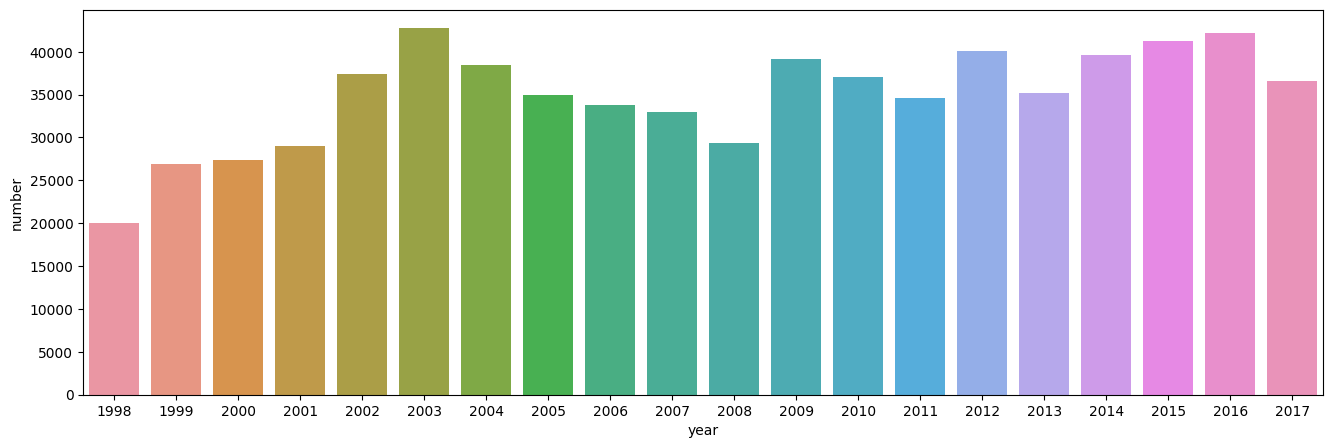

In [23]:
plt.figure(figsize=(16,5))
sns.barplot(data2, x = 'year', y = 'number')

#### 12. In which state maximum number of forest fires were reported?

In [24]:
data.columns

Index(['year', 'state', 'month', 'number', 'date', 'month_new'], dtype='object')

In [25]:
data['state'].unique()

array(['Acre', 'Alagoas', 'Amapa', 'Amazonas', 'Bahia', 'Ceara',
       'Distrito Federal', 'Espirito Santo', 'Goias', 'Maranhao',
       'Mato Grosso', 'Minas Gerais', 'Pará', 'Paraiba', 'Pernambuco',
       'Piau', 'Rio', 'Rondonia', 'Roraima', 'Santa Catarina',
       'Sao Paulo', 'Sergipe', 'Tocantins'], dtype=object)

In [26]:
data['state'].nunique()

23

In [27]:
data3 = data.groupby('state')['number'].sum().reset_index()
data3

,state,number
0,Acre,18464.030
1,Alagoas,4606.000
2,Amapa,21831.576
3,Amazonas,30650.129
4,Bahia,44746.226
5,Ceara,30428.063
6,Distrito Federal,3561.000
7,Espirito Santo,6546.000
8,Goias,37695.520
9,Maranhao,25129.131


<AxesSubplot: xlabel='state', ylabel='number'>

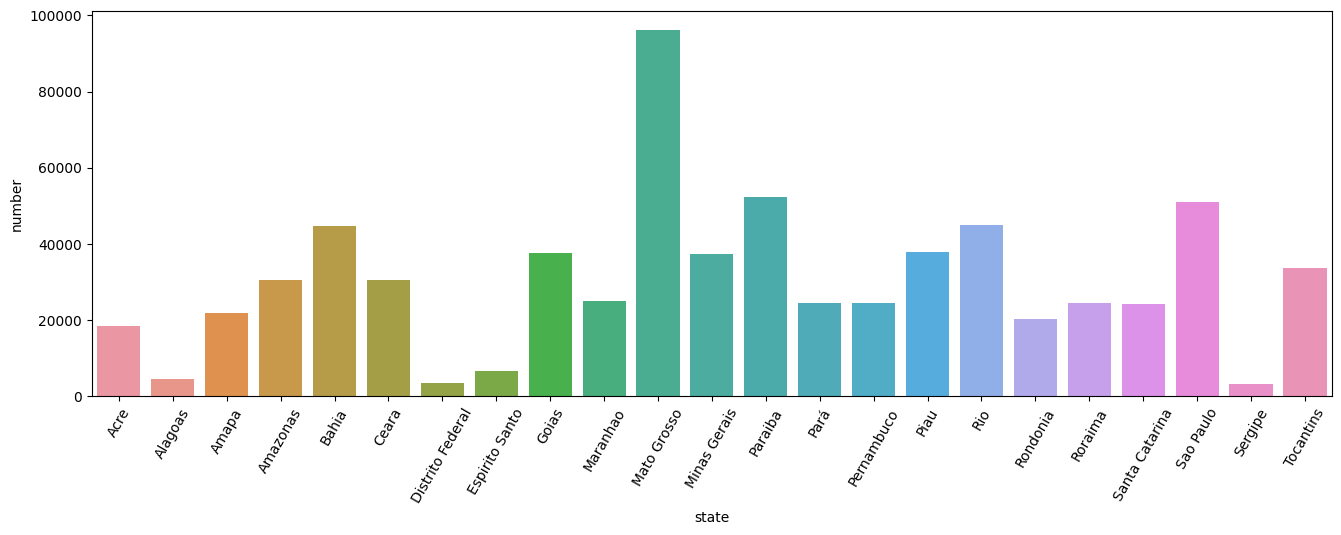

In [28]:
plt.figure(figsize=(16,5))
plt.xticks(rotation = 60)
sns.barplot(data3 , x = 'state', y = 'number')

#### 13. Find total number of fire were reported in amazonas

In [29]:
data.columns

Index(['year', 'state', 'month', 'number', 'date', 'month_new'], dtype='object')

In [30]:
data['state'].unique()

array(['Acre', 'Alagoas', 'Amapa', 'Amazonas', 'Bahia', 'Ceara',
       'Distrito Federal', 'Espirito Santo', 'Goias', 'Maranhao',
       'Mato Grosso', 'Minas Gerais', 'Pará', 'Paraiba', 'Pernambuco',
       'Piau', 'Rio', 'Rondonia', 'Roraima', 'Santa Catarina',
       'Sao Paulo', 'Sergipe', 'Tocantins'], dtype=object)

In [31]:
data[data['state'] == 'Amazonas']['number'].sum()

30650.129

#### 14. Display number of fires were reported in amazonas (year-wise)

In [32]:
data4 = data[data['state'] == 'Amazonas'].groupby('year')['number'].sum()
data4 = data4.reset_index()
data4

,year,number
0,1998,946.000
1,1999,1061.000
2,2000,853.000
3,2001,1297.000
4,2002,2852.000
5,2003,1524.268
6,2004,2298.207
7,2005,1657.128
8,2006,997.640
9,2007,589.601


<AxesSubplot: xlabel='year', ylabel='number'>

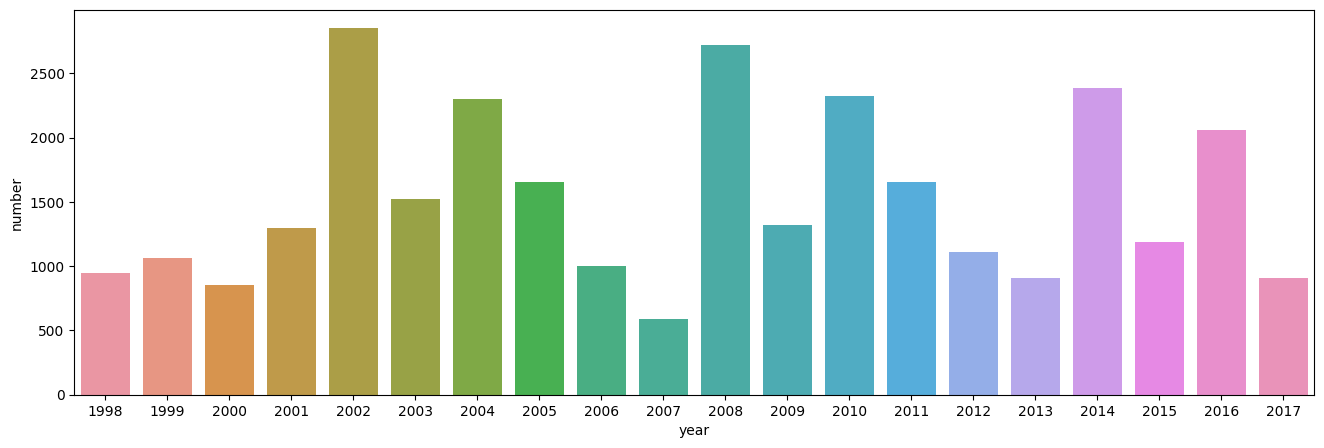

In [33]:
plt.figure(figsize=(16,5))
sns.barplot(data4 , x = 'year', y = 'number')

#### 15 Display number fires were repored in amazonas (day-wise)

In [34]:
data.columns

Index(['year', 'state', 'month', 'number', 'date', 'month_new'], dtype='object')

In [35]:
data5 = data[data['state'] == "Amazonas"]

In [36]:
day = data5.groupby(data5['date'].dt.dayofweek).sum().number

import calendar
day.index = [calendar.day_name[x] for x in range(0,7)]
day = day.reset_index()

C:\Users\migue\AppData\Local\Temp\ipykernel_25732\572958958.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  day = data5.groupby(data5['date'].dt.dayofweek).sum().number


In [37]:
day = day.reset_index()
day

,level_0,index,number
0,0,Monday,1886.601
1,1,Tuesday,6474.217
2,2,Wednesday,3910.177
3,3,Thursday,5754.802
4,4,Friday,5446.480
5,5,Saturday,4162.666
6,6,Sunday,3015.186


(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Monday'),
  Text(1, 0, 'Tuesday'),
  Text(2, 0, 'Wednesday'),
  Text(3, 0, 'Thursday'),
  Text(4, 0, 'Friday'),
  Text(5, 0, 'Saturday'),
  Text(6, 0, 'Sunday')])

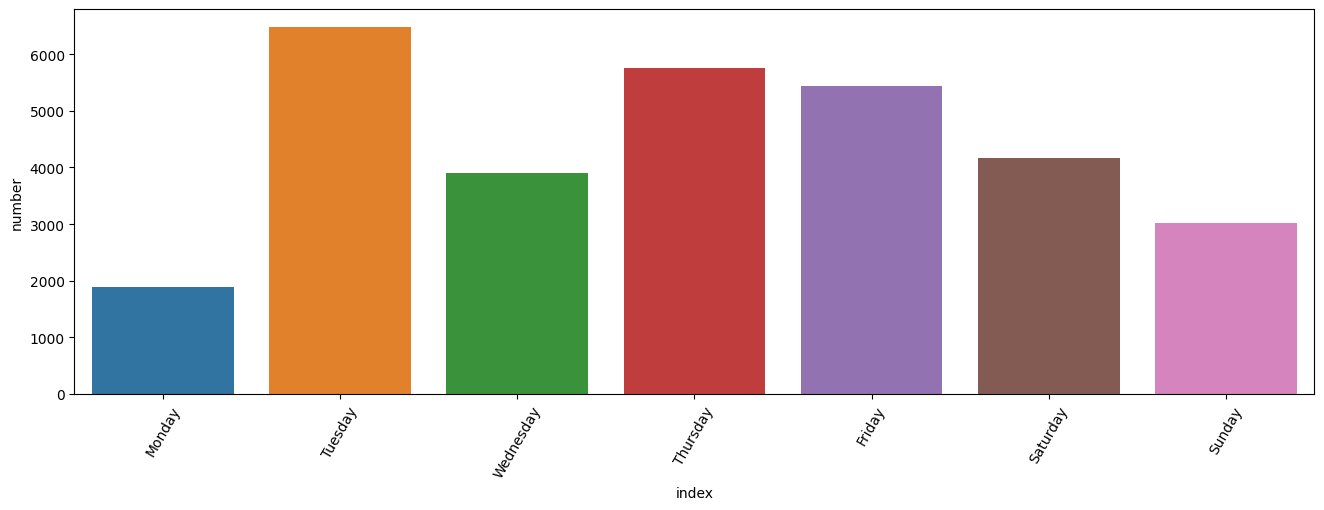

In [38]:
plt.figure(figsize=(16,5))
sns.barplot(day, x = 'index' , y = 'number')
plt.xticks(rotation = 60)

#### 16. Find total number of fires were reported in 2015 and visualize data base on each month

In [39]:
data.columns

Index(['year', 'state', 'month', 'number', 'date', 'month_new'], dtype='object')

In [40]:
data6 = data[data['year'] == 2015]

In [41]:
data6 = data6.groupby('month_new')['number'].sum().reset_index()
data6

,month_new,number
0,April,2573.000
1,August,4363.125
2,Dec,4088.522
3,Feb,2309.000
4,Jan,4635.000
5,July,4364.392
6,Jun,3260.552
7,March,2202.000
8,May,2384.000
9,Nov,4034.518


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'April'),
  Text(1, 0, 'August'),
  Text(2, 0, 'Dec'),
  Text(3, 0, 'Feb'),
  Text(4, 0, 'Jan'),
  Text(5, 0, 'July'),
  Text(6, 0, 'Jun'),
  Text(7, 0, 'March'),
  Text(8, 0, 'May'),
  Text(9, 0, 'Nov'),
  Text(10, 0, 'Oct'),
  Text(11, 0, 'Sep')])

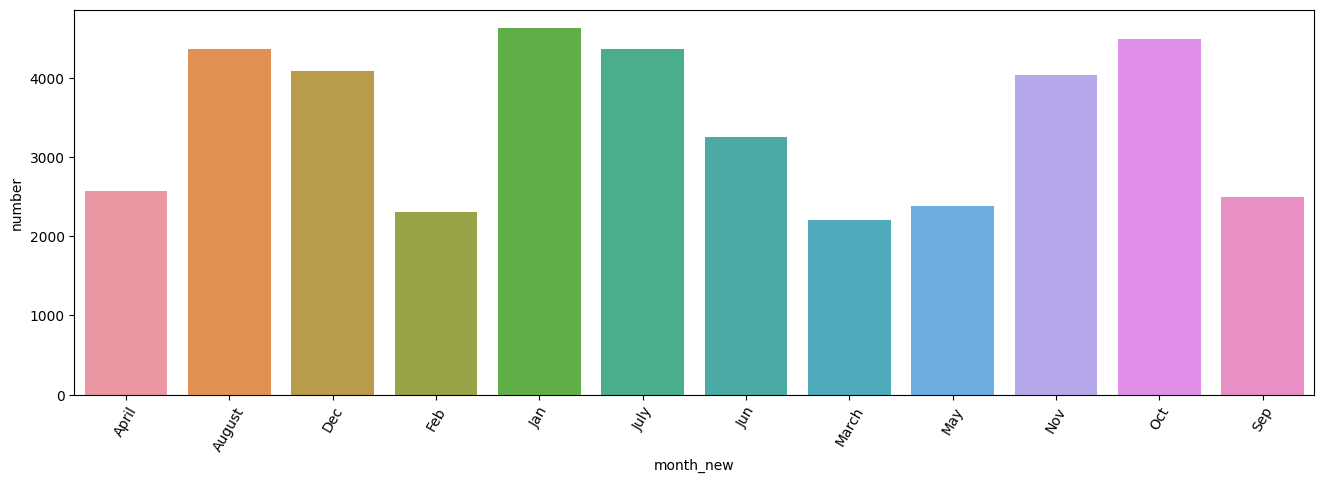

In [42]:
plt.figure(figsize=(16,5))
sns.barplot(data6, x = 'month_new', y = 'number')
plt.xticks(rotation = 60)

#### 17. Find average number of fires were reported from highest to lowest (state-wise)

In [43]:
data.columns

Index(['year', 'state', 'month', 'number', 'date', 'month_new'], dtype='object')

In [44]:
data7 = data.groupby('state')['number'].mean().sort_values(ascending=False).reset_index()

In [45]:
data7

,state,number
0,Sao Paulo,213.896226
1,Mato Grosso,203.479975
2,Bahia,187.222703
3,Piau,158.174674
4,Goias,157.721841
5,Minas Gerais,156.800243
6,Tocantins,141.037176
7,Amazonas,128.243218
8,Ceara,127.314071
9,Paraiba,111.073979


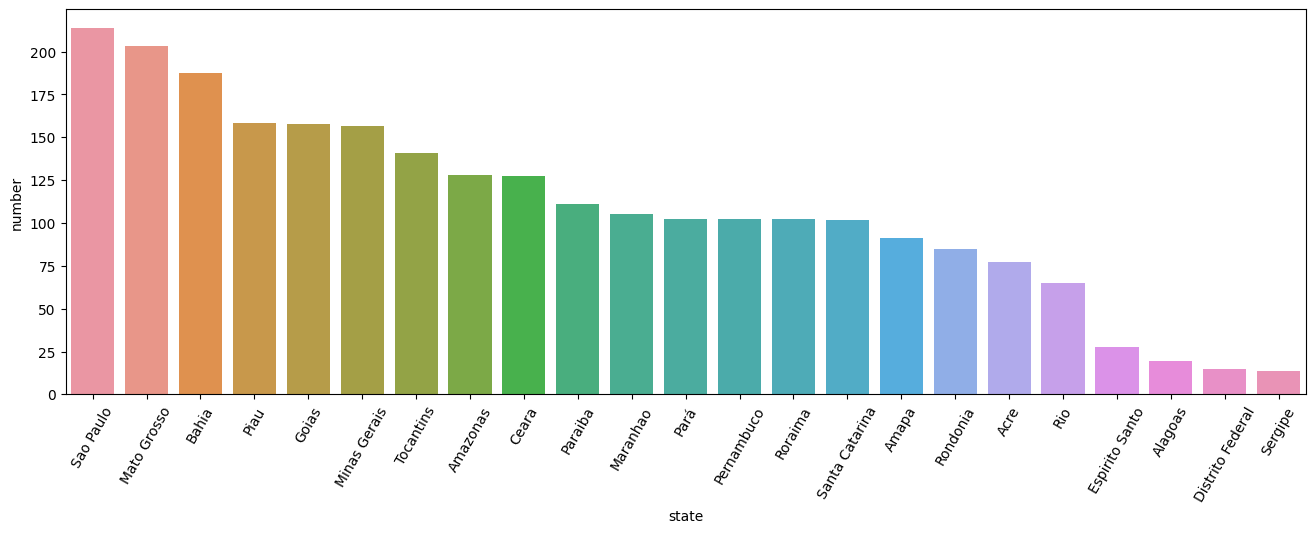

In [46]:
plt.figure(figsize=(16,5))
sns.barplot(data7 , x = 'state' ,y = 'number')
plt.xticks(rotation = 60)
plt.show()

#### 18. To find the state where fires were reported in 'dec' month

In [47]:
data.columns

Index(['year', 'state', 'month', 'number', 'date', 'month_new'], dtype='object')

In [48]:
data['month_new'].unique()

array(['Jan', 'Feb', 'March', 'April', 'May', 'Jun', 'July', 'August',
       'Sep', 'Oct', 'Nov', 'Dec'], dtype=object)

In [49]:
data[data['month_new'] == 'Dec']['state'].unique()

array(['Acre', 'Alagoas', 'Amapa', 'Amazonas', 'Bahia', 'Ceara',
       'Distrito Federal', 'Espirito Santo', 'Goias', 'Maranhao',
       'Mato Grosso', 'Minas Gerais', 'Pará', 'Paraiba', 'Pernambuco',
       'Piau', 'Rio', 'Rondonia', 'Roraima', 'Santa Catarina',
       'Sao Paulo', 'Sergipe', 'Tocantins'], dtype=object)